# Jupyter Notebook to demonstrate the basic functions of MARKOVCLICK
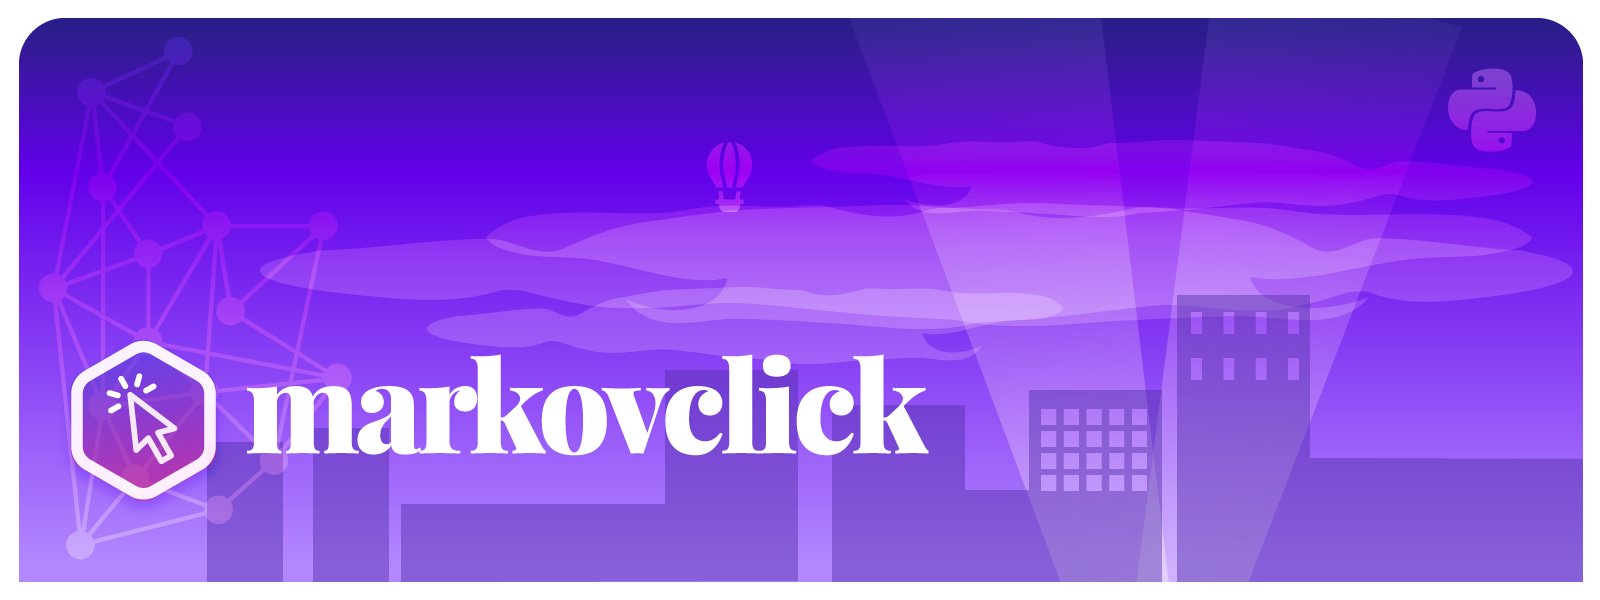
**markovclick** is a Python implementation by [Ismail Uddin](https://www.linkedin.com/in/ismailuddin/?originalSubdomain=uk) of the **R package clickstream** which models website clickstreams as Markov chains.

*markovclick* allows you to model clickstream data from websites as Markov chains, which can then be used to predict the next likely click on a website for a user, given their history and current state.  
</br>

Source: https://github.com/ismailuddin/markovclick   
> See the [snykAdvisor](https://snyk.io/advisor/python/markovclick) for a health check of the markovclick library

Documentation: https://markovclick.readthedocs.io/en/latest/index.html#  

Libraries:
* markovclick
* seaborn

---

Author: 
*   dr.daniel benninger  

History: 
*   v1, April 2022, dbe --- initial version for BINA FS22
*   

### Installation

In [1]:
pip install markovclick

### Quick start
To start using the package without any data, markovclick can produce dummy data for you to experiment with:

In the context of this package, **streams** (or **sessions**) refer to a *series of clicks belonging to a given user*. The time difference between clicks is defined by the user when assembling these streams, but is typically taken to be 30 minutes in the industry.

The pages refer to the individual clicks of the user, and thus the pages they visit. Rather than storing the entire URL of the page the user visits, it is better to encode pages using a simple code such as PXX where XX can be any number. 

This strategy can be used to group similar pages under the same code, as modelling them as separate pages is sometimes not useful leading to an excessively large probability matrix.

In [2]:
from markovclick import dummy
clickstream = dummy.gen_random_clickstream(n_of_streams=100, n_of_pages=12)

In [3]:
print(clickstream)

[['P4', 'P7', 'P7', 'P5', 'P3', 'P8', 'P5', 'P11', 'P0', 'P5'], ['P11', 'P4', 'P11', 'P3', 'P7', 'P6', 'P11', 'P2'], ['P9', 'P10', 'P2', 'P10', 'P0', 'P0', 'P1', 'P4', 'P3', 'P5'], ['P8', 'P4', 'P9', 'P7', 'P9', 'P8', 'P10', 'P4', 'P2', 'P7', 'P11'], ['P8', 'P4', 'P5', 'P8', 'P11', 'P4', 'P6', 'P0'], ['P5', 'P5', 'P10', 'P11', 'P8', 'P11', 'P10', 'P3', 'P0', 'P11'], ['P8', 'P7', 'P6', 'P9', 'P10', 'P0', 'P10', 'P10', 'P8', 'P6', 'P3'], ['P0', 'P3', 'P1', 'P4', 'P6', 'P0', 'P9', 'P8'], ['P9', 'P7', 'P5', 'P8', 'P8', 'P0', 'P7', 'P2'], ['P4', 'P6', 'P10', 'P5', 'P1', 'P0', 'P2', 'P1', 'P9', 'P10'], ['P9', 'P5', 'P9', 'P7', 'P10', 'P0', 'P6', 'P0', 'P8', 'P6', 'P0'], ['P2', 'P4', 'P7', 'P7', 'P3', 'P8', 'P3', 'P8', 'P3', 'P2'], ['P5', 'P6', 'P6', 'P3', 'P7', 'P11', 'P3', 'P11', 'P1'], ['P10', 'P11', 'P2', 'P5', 'P5', 'P4', 'P7', 'P1', 'P4'], ['P5', 'P0', 'P11', 'P6', 'P10', 'P8', 'P2', 'P5'], ['P10', 'P8', 'P7', 'P6', 'P2', 'P9', 'P9', 'P0'], ['P3', 'P4', 'P10', 'P10', 'P8', 'P5', 'P7', '

### Markov Chains
To build a Markov chain from the dummy data:

In [4]:
from markovclick.models import MarkovClickstream
m = MarkovClickstream(clickstream)

The instance *m* of the MarkovClickstream class provides access the class's attributes such as the probability matrix (*m.prob_matrix*) used to model the Markov chain, and the list of unique pages (*m.pages*) featuring in the clickstream.

In [6]:
print(m.prob_matrix)

[[0.08108108 0.08108108 0.12162162 0.09459459 0.05405405 0.08108108
  0.13513514 0.02702703 0.12162162 0.05405405 0.08108108 0.06756757]
 [0.13636364 0.06060606 0.07575758 0.04545455 0.07575758 0.04545455
  0.13636364 0.04545455 0.12121212 0.07575758 0.09090909 0.09090909]
 [0.07575758 0.09090909 0.13636364 0.04545455 0.06060606 0.07575758
  0.07575758 0.07575758 0.07575758 0.12121212 0.10606061 0.06060606]
 [0.09803922 0.09803922 0.05882353 0.01960784 0.11764706 0.05882353
  0.07843137 0.05882353 0.15686275 0.05882353 0.11764706 0.07843137]
 [0.06779661 0.06779661 0.03389831 0.05084746 0.06779661 0.13559322
  0.15254237 0.10169492 0.01694915 0.10169492 0.08474576 0.11864407]
 [0.09677419 0.06451613 0.0483871  0.09677419 0.11290323 0.03225806
  0.03225806 0.14516129 0.08064516 0.09677419 0.11290323 0.08064516]
 [0.08974359 0.06410256 0.05128205 0.07692308 0.03846154 0.11538462
  0.1025641  0.08974359 0.12820513 0.06410256 0.08974359 0.08974359]
 [0.06097561 0.08536585 0.08536585 0.0853

In [5]:
print(m.pages)

['P0', 'P1', 'P10', 'P11', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']


### PageRank Score
The PageRank score for each page in the clickstream can also be calculated as follows:

In [7]:
digraph, pagerank = m.calculate_pagerank(max_nodes=2)

The *digraph* object holds the networkx DiGraph class which was used to calculate the PageRank score, and the *pagerank* object is a dictionary of PageRank scores for each page in the network.

In [8]:
print(pagerank)

{'P0': 0.06395821690077501, 'P4': 0.05030693521561018, 'P6': 0.10857795678141884, 'P1': 0.0125, 'P10': 0.11572252183139428, 'P7': 0.09929938462632648, 'P11': 0.0125, 'P8': 0.08850955878510666, 'P2': 0.0125, 'P3': 0.03919274282182153, 'P5': 0.269777800131174, 'P9': 0.12715488290637295}


### Visualisation
The **probability matrix** can be visualised as a *heatmap* as follows:

In [10]:
import seaborn as sns

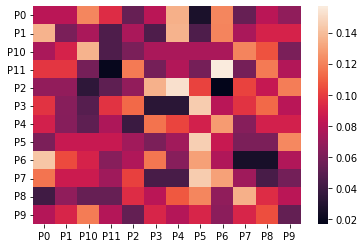

In [11]:
sns.heatmap(m.prob_matrix, xticklabels=m.pages, yticklabels=m.pages)

A **Markov chain** can be thought of as a *graph of nodes and edges*, with the edges representing the transitions from each state. markovclick provides a wrapper function around the graphviz package to visualise the Markov chain in this manner.

In [13]:
from markovclick.viz import visualise_markov_chain
graph = visualise_markov_chain(m)

The function visualise_markov_chain() returns a Digraph object, which can be viewed directly inside a Jupyter notebook by simply calling the reference to the object returned. 

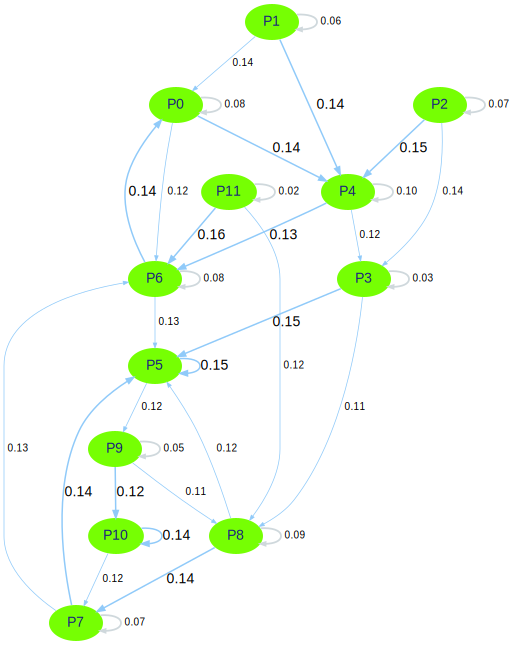

In [15]:
graph

It can also be outputted to a PDF file by calling the render() function on the object.

In [17]:
graph.render("MarkovChain-dummydata")

'MarkovChain-dummydata.pdf'

In the graph produced, the nodes representing the individual pages are shown in green, and up to 3 edges from each node are rendered. The first edge is in a thick blue arrow, depicting the most likely transition from this page / state to the next page / state. The second edge depicted by a thinner blue arrow, depicts the second most likely transition from this state. Finally, a third edge is shown that depicts the transition from this page / state back to itself (light grey). This edge is only shown if the the two most likely transitions are not already to itself. For all transitions, the probability is shown next to the edge (arrow).

## Outlook

Clickstream processing with **markovclick.preprocessing**
markovclick provides functions to process clickstream data such as server logs, which contain unique identifiers such as cookie IDs associated with each click. This allows clicks to be aggregated into groups, whereby clicks from the same browser (identified by the unique identifier) are grouped such that the difference between individual clicks does not exceed the maximum session timeout (typically taken to be 30 minutes).

### [Sessionise clickstream data](https://github.com/ismailuddin/markovclick#clickstream-processing-with-markovclickpreprocessing)
To **sessionise** clickstream data, the following code can be used that require a pandas DataFrame object.